In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('C:\\Users\\MSI PC\\Desktop\\Encryptix\\Credit Card Fraud Detection\\creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**E.D.A & Missing Value Treatment**

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

*No Missing Values.*

Class
0    284315
1       492
Name: count, dtype: int64

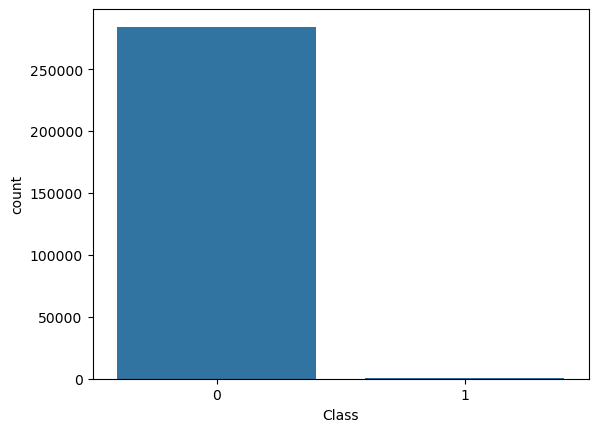

In [5]:
sns.countplot(data=df,x='Class')
df['Class'].value_counts()

In [6]:
attr = df.drop(columns=['Time','Class','Amount'],axis=1)

Clearly indication of highly imbalance in case of Fradulant transanctions.

C:\Users\MSI PC\AppData\Local\Temp\ipykernel_10656\2462993713.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(attr[col], ax=axs[ind])
C:\Users\MSI PC\AppData\Local\Temp\ipykernel_10656\2462993713.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(attr[col], ax=axs[ind])
C:\Users\MSI PC\AppD

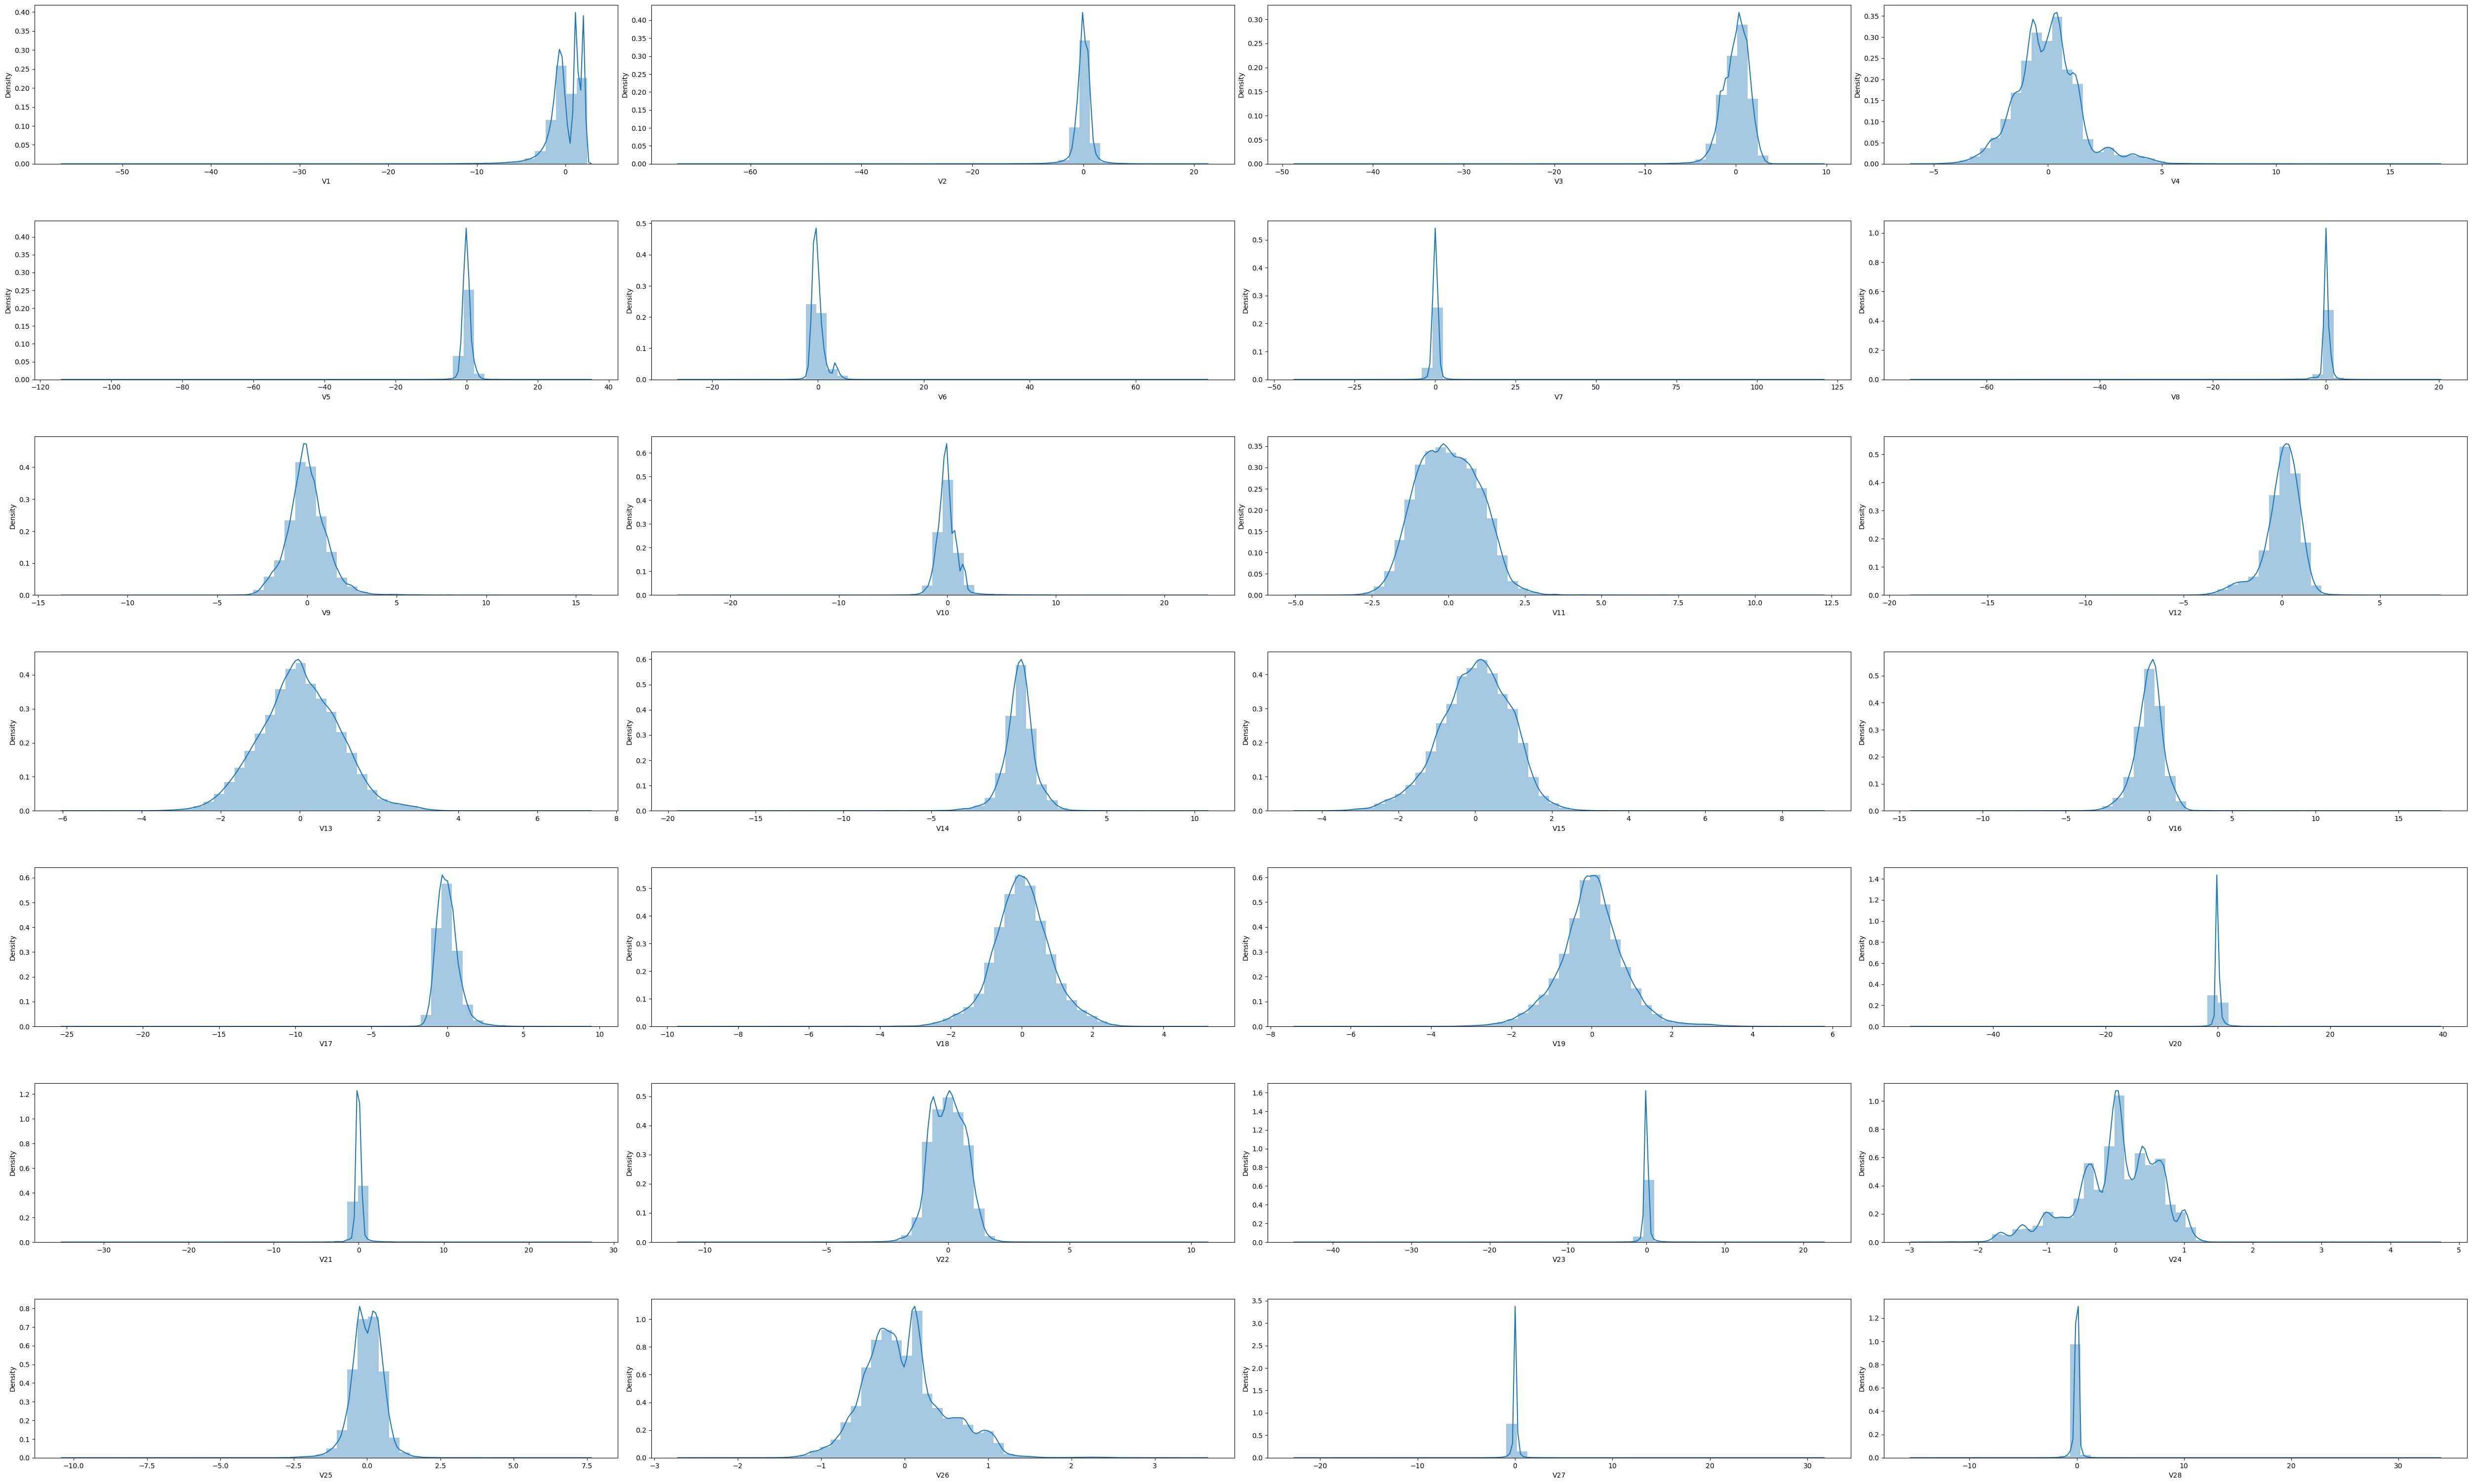

In [7]:
fig, axes= plt.subplots(ncols=4, nrows=7,figsize=(50,30))
ind=0
axs = axes.flatten()#to convert n-dimensional array to 1d
for col in attr.columns:
    sns.distplot(attr[col], ax=axs[ind])
    ind += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)

C:\Users\MSI PC\AppData\Local\Temp\ipykernel_10656\2945972173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Amount'])


<Axes: xlabel='Amount', ylabel='Density'>

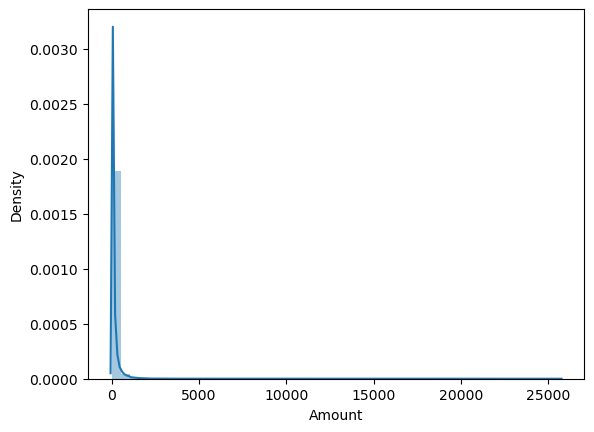

In [8]:
sns.distplot(df['Amount'])

C:\Users\MSI PC\AppData\Local\Temp\ipykernel_10656\1125727111.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Time'])


<Axes: xlabel='Time', ylabel='Density'>

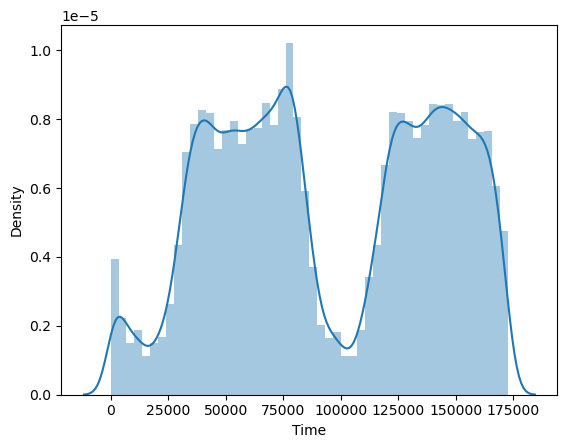

In [9]:
sns.distplot(df['Time'])

In [10]:
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head(5)

,scaled_amount,scaled_time,Time,V1,V2,V3,V4,V5,V6,V7,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.783274,-0.994983,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,-0.269825,-0.994983,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,4.983721,-0.994972,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.418291,-0.994972,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.670579,-0.994960,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**We use robust scaler, as robust scaler is less prone to outliers, for scaling.**

## **Train Test Split , Scaling & Resampling**

In [11]:
X=df.drop(columns=['Time','Amount','Class'],axis=1)
y=df['Class']

In [12]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]
print(fraud.shape,normal.shape)

(492, 33) (284315, 33)


In [13]:
smk = SMOTETomek(random_state=69)
X_res, y_res = smk.fit_resample(X,y)

SMOTETomek combined sampler is used as dataset is huge so we cant just loose many information by using undersampling and also can't tend to do overfitting by doing only oversampling.

In [14]:
print(X_res.shape,y_res.shape)

(568630, 30) (568630,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=69)

In [15]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

## **MODEL DEPLOYMENT**

**(1) Logistic Regression**

In [16]:
l_m = LogisticRegression(max_iter=5000)
log_model= l_m.fit(X_train_scl,y_train)
y_pred_log=log_model.predict(X_test_scl)

Text(0.5, 1.0, 'Confusion Matrix(Logistic Regression)')

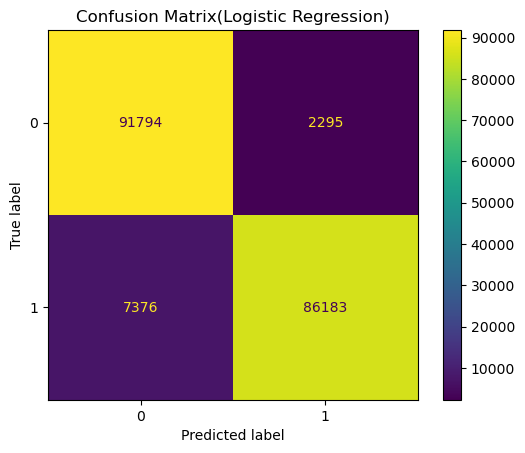

In [17]:
cm = confusion_matrix(y_test, y_pred_log, labels=log_model.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
cm_disp.plot()
plt.title("Confusion Matrix(Logistic Regression)")

In [18]:
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_log))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     94089
           1       0.97      0.92      0.95     93559

    accuracy                           0.95    187648
   macro avg       0.95      0.95      0.95    187648
weighted avg       0.95      0.95      0.95    187648

Accuracy Score:
0.948462013983629


**(2) Random Forest Classifier**

In [19]:
rfc = RandomForestClassifier()

rfc.fit(X_train,y_train)

y_pred_rfc = rfc.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix(Random Forest Classifier)')

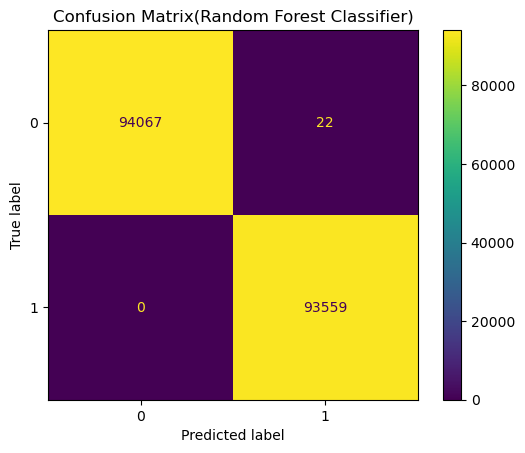

In [20]:
cm = confusion_matrix(y_test, y_pred_rfc, labels=rfc.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
cm_disp.plot()
plt.title("Confusion Matrix(Random Forest Classifier)")

In [23]:
accuracy = accuracy_score(y_test, y_pred_rfc)
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
class_report = classification_report(y_test, y_pred_rfc)

print("Accuracy:",accuracy)
print("\n\nConfusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9998827592087313


Confusion Matrix:
[[94067    22]
 [    0 93559]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     94089
           1       1.00      1.00      1.00     93559

    accuracy                           1.00    187648
   macro avg       1.00      1.00      1.00    187648
weighted avg       1.00      1.00      1.00    187648



**(3) Support Vector Classifier**

In [ ]:
svc = SVC()
svc.fit(X_train_scl, y_train)

y_pred_svc = svc.predict(X_test_scl)

Text(0.5, 1.0, 'Confusion Matrix(Support Vector Classifier)')

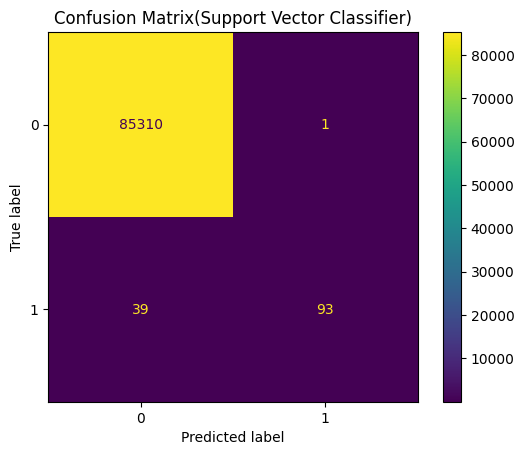

In [ ]:
cm = confusion_matrix(y_test, y_pred_svc, labels=svc.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
cm_disp.plot()
plt.title("Confusion Matrix(Support Vector Classifier)")

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_svc))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85311
           1       0.99      0.70      0.82       132

    accuracy                           1.00     85443
   macro avg       0.99      0.85      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy Score:
0.9995318516437859


**In Conclusion**